In [1]:
import sys, h5py, pdb,time, glob
from importlib import reload
import pylab as pl, numpy as np
from numpy import log10 as log
from astropy import units as un, constants as cons
import scipy, scipy.stats
from matplotlib import ticker
sys.path.append('../pysrc')

In [2]:
import FIRE_files as ff
from FIRE_files import cosmo, u
from projectPlotBasics import *
import first_pass as l
cmap = pl.get_cmap('viridis')

Behroozi+18 not loaded


In [3]:
simname = 'vc100_Rs0_Mdot535_Rcirc10'
vc = float(simname.split('_')[0][2:])
Rcirc = float(simname.split('_')[3][5:])
simdir = '../../data/%s/output/'%simname

In [4]:
sim = l.KY_sim(simname,simdir,5e11*un.Msun,200*un.kpc,
               dynamicCentering=True,recalc=False,centerOnBlackHole=True,Nsnapshots=None,
               origin=np.zeros(3),Rcirc = Rcirc*un.kpc,
              analyticGravity= l.PowerLawPotential(m=0.,vc_Rvir=vc*un.km/un.s,Rvir=200*un.kpc))

print(sim.galaxyname, sim.Nsnapshots())

vc100_Rs0_Mdot535_Rcirc10 401


../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np

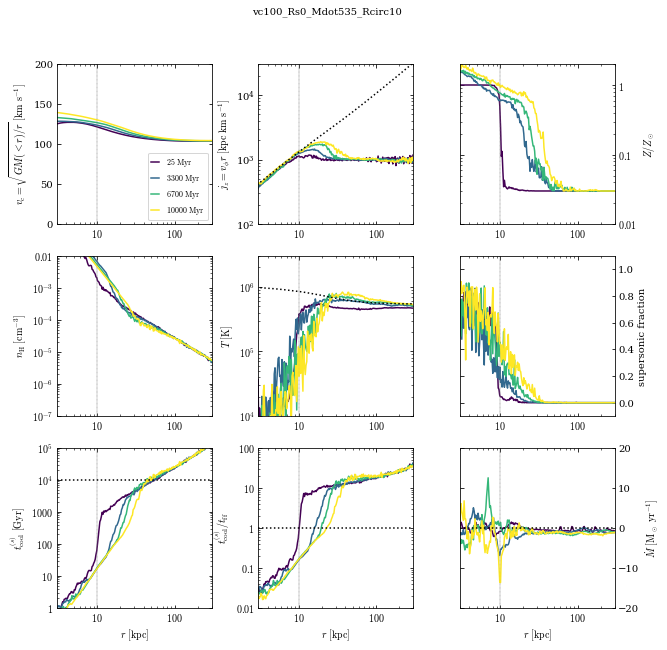

In [6]:
reload(l)
iSnapshots = np.linspace(1,sim.Nsnapshots()-1,4).astype(int)
l.CGM_properties(sim, iSnapshots,Rcirc=10)
pl.savefig(l.figdir+'radial_profiles_%s.pdf'%str(sim))

In [7]:
snapshot = sim.getSnapshot(400)
r = 30
inds = (snapshot.rs() < r*1.1) & (snapshot.rs()>r/1.1)

Text(0, 0.5, '$v_{\\rm phi}\\ [{\\rm km}{\\rm s}^{-1}]$')

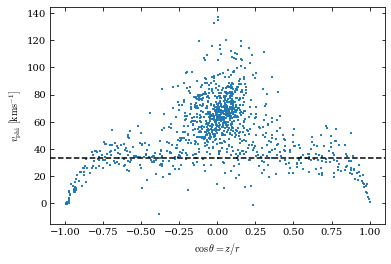

In [10]:
pl.scatter(snapshot.cos_theta()[inds], snapshot.v_phi()[inds],marker=',',s=1)
pl.axhline(1000/r,c='k',ls='--')
pl.xlabel(r'$\cos \theta = z/r$')
pl.ylabel(r'$v_{\rm phi}\ [{\rm km}{\rm s}^{-1}]$')
          